PROJCS["ETRS_1989_UTM_Zone_32N_8stellen",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102329"]]


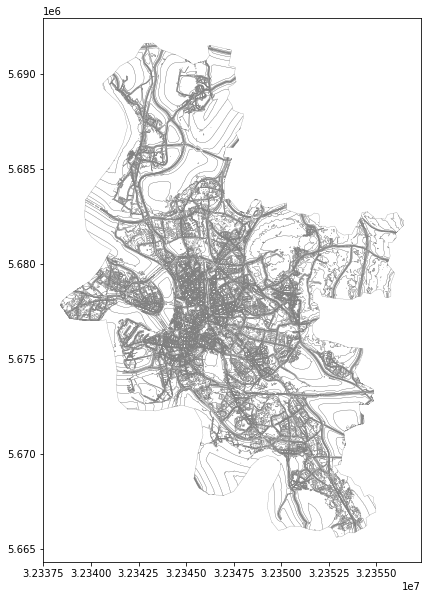

In [1]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

duss = gpd.read_file("Straßenlärmkarte_Düsseldorf_2018/StrLK_2018_tagsüber.shp")

ax = duss.plot(figsize=(10,10), color='None', edgecolor='grey', linewidth=0.25)


print(duss.crs)

In [2]:
type(duss)

geopandas.geodataframe.GeoDataFrame

In [3]:
duss.crs

<Derived Projected CRS: ESRI:102329>
Name: ETRS_1989_UTM_Zone_32N_8stellen
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
duss = duss.to_crs(4326)

In [5]:
duss.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

epsg:3857


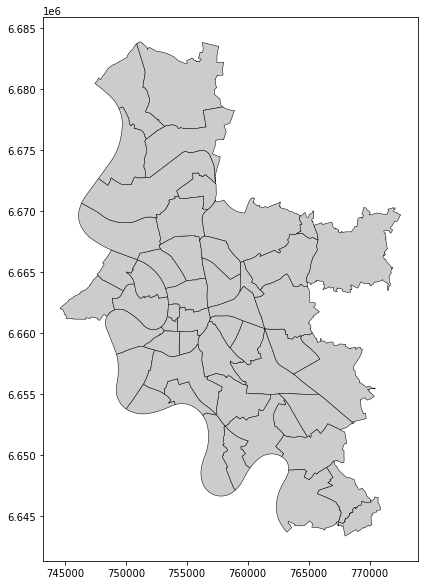

In [7]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

dus = gpd.read_file("Stadtteile/Düsseldorf_Stadtteile.shp")

ax = dus.plot(figsize=(10,10), color='#CCCCCC', edgecolor='black', linewidth=0.5)

print(dus.crs)

In [8]:
dus = dus.to_crs(4326)

In [9]:
dus.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import folium
import contextily as cx
import shapely
from shapely.geometry import Point
from pathlib import Path
import pyproj
%matplotlib inline

In [11]:
dataset = pd.read_csv('noise_dus.csv')

In [26]:
df = dataset.sample(500)

##### Syntax:

##### DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

Parameters:

n: int value, Number of random rows to generate.

frac: Float value, Returns (float value * length of data frame values ).
frac cannot be used with n.

replace: Boolean value, return sample with replacement if True.

random_state: int value or numpy.random.RandomState, optional. if set to a particular integer, will return same rows as sample in every iteration.

axis: 0 or ‘row’ for Rows and 1 or ‘column’ for Columns.

In [27]:
df.set_index('Index', inplace=True)

DataFrames and Series always have an index. Although it displays alongside the column(s), it is not a column, which is why del df['index'] did not work.

If you want to replace the index with simple sequential numbers, use df.reset_index().

You can set one of the columns as an index in case it is an "id" for example. In this case the index column will be replaced by one of the columns you have chosen.

df.set_index('id', inplace=True)

In [28]:
df['Bezirk']=df['Bezirk'].astype(str)
df['DB_TAG']=df['DB_TAG'].astype(float)
df['DB_NACHT']=df['DB_NACHT'].astype(float)
df.replace(' ', np.nan,inplace=True)
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].astype(float)

In [29]:
from shapely.geometry import Point, Polygon
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [30]:
noise=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude,df.Latitude,crs="EPSG:4326"))
noise

,Bezirk,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
Index,,,,,,
24900,"Flensburger StraÃŸe 27, DÃ¼sseldorf, Germany",48.0,41.0,51.268044,6.779213,POINT (6.77921 51.26804)
11200,"Bayreuther StraÃŸe 44, DÃ¼sseldorf, Germany",58.0,50.0,51.171026,6.869688,POINT (6.86969 51.17103)
43634,"Kieshecker Weg 38, DÃ¼sseldorf, Germany",52.0,45.0,51.281918,6.793223,POINT (6.79322 51.28192)
60324,"Posener StraÃŸe 65, DÃ¼sseldorf, Germany",65.0,56.0,51.213185,6.837206,POINT (6.83721 51.21319)
25158,"FlÃ¶ÃŸerstraÃŸe 12, DÃ¼sseldorf, Germany",53.0,45.0,51.146465,6.872309,POINT (6.87231 51.14647)
...,...,...,...,...,...,...
42709,"Karl-Kleppe-StraÃŸe 9, DÃ¼sseldorf, Germany",57.0,48.0,51.253257,6.755371,POINT (6.75537 51.25326)
19333,"Dillenburger Weg 31, DÃ¼sseldorf, Germany",58.0,50.0,51.198899,6.826673,POINT (6.82667 51.19890)
9382,"ArnulfstraÃŸe 2a, DÃ¼sseldorf, Germany",64.0,57.0,51.231921,6.751521,POINT (6.75152 51.23192)


In [44]:
maxx = noise.loc[noise['DB_TAG'].idxmax()]
minn = noise.loc[noise['DB_TAG'].idxmin()]
print(maxx)
print(minn)

Bezirk        PÃ¶hlenweg 1, DÃ¼sseldorf, Germany
DB_TAG                                      76.0
DB_NACHT                                    67.0
Latitude                               51.240406
Longitude                               6.833387
geometry     POINT (6.83338738951229 51.2404056)
Name: 60168, dtype: object
Bezirk       PelmanstraÃŸe 23, DÃ¼sseldorf, Germany
DB_TAG                                         41.0
DB_NACHT                                       33.0
Latitude                                  51.259484
Longitude                                  6.860621
geometry        POINT (6.86062094287144 51.2594837)
Name: 59123, dtype: object


<AxesSubplot:>

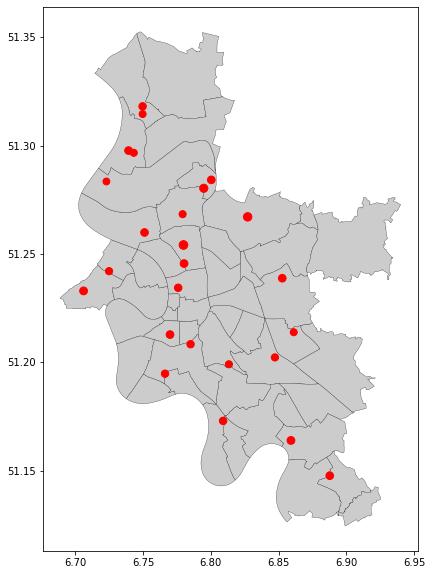

In [18]:
dus_plot = dus.plot(color='#CCCCCC', edgecolor='black', linewidth=0.25, figsize=(15, 10))
noise.plot(ax=dus_plot, markersize=noise['DB_TAG'], color="red", marker="o")


<AxesSubplot:>

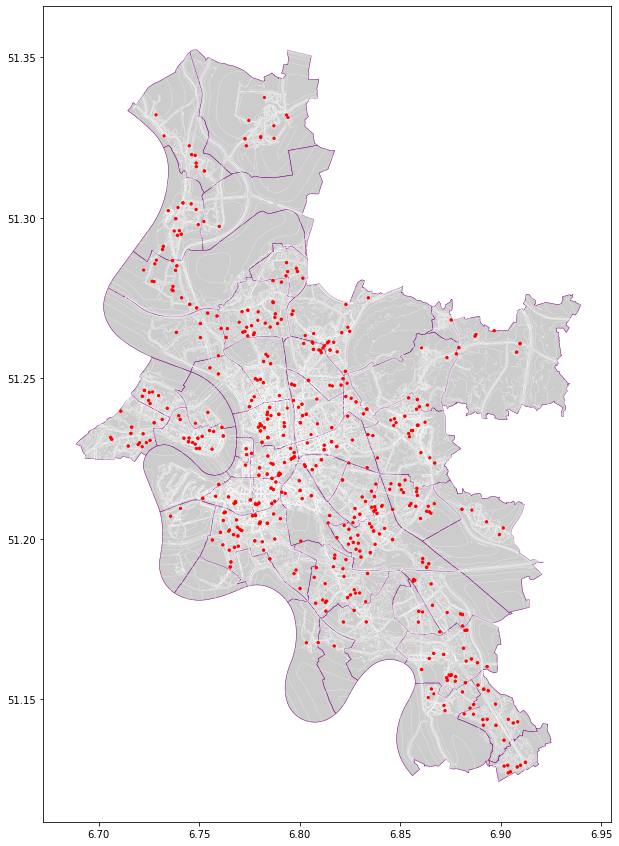

In [179]:
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='#CCCCCC', edgecolor='purple', linewidth=0.5, zorder=1)
duss.plot(ax=ax, color='None', edgecolor='white', linewidth=0.25, zorder=2, alpha=0.5)
noise.plot(ax=ax, markersize=noise['DB_TAG']/10, color="red", zorder=3)

In [158]:
76**4

33362176

<AxesSubplot:>

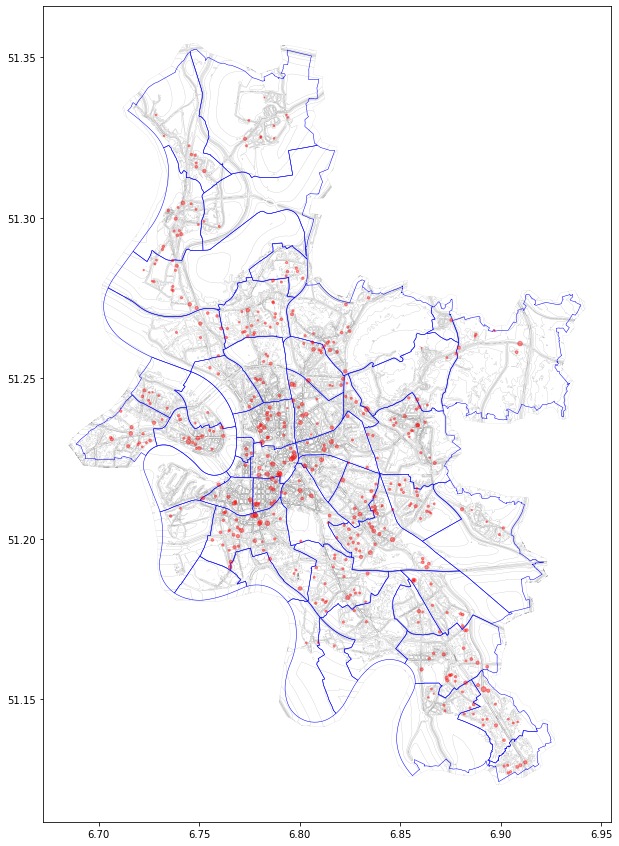

In [166]:
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
noise.plot(ax=ax, markersize=(noise['DB_TAG'])**5/(10**8), color="red", marker="o", zorder=3, alpha=0.4)

<AxesSubplot:>

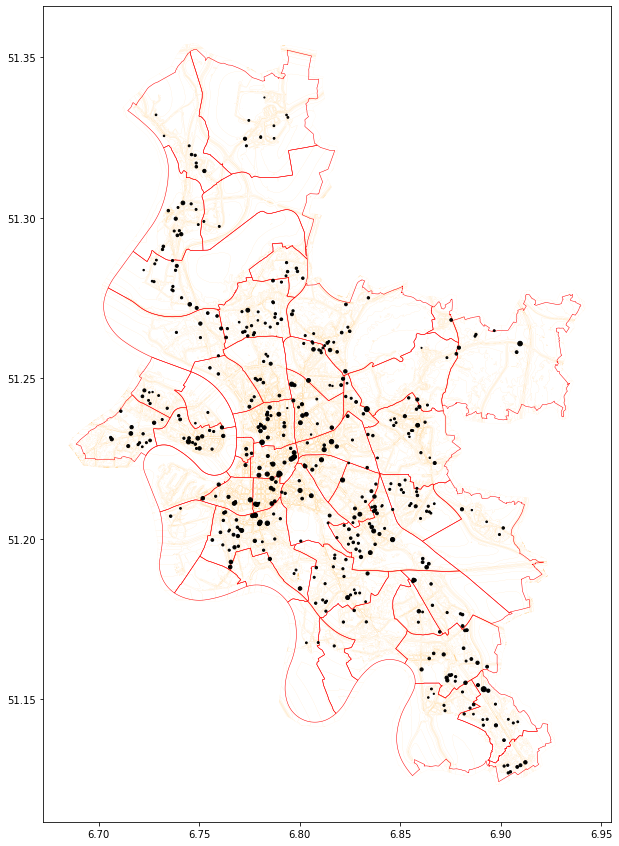

In [174]:
color = [(str(1/(item)**2))for item in noise['DB_TAG']]
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='red', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='orange', linewidth=0.125, zorder=1, alpha=0.2)
noise.plot(ax=ax, markersize=(noise['DB_TAG'])**5/(10**8), c=color, zorder=3)

#### mpl colormap

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://bids.github.io/colormap/

https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

<AxesSubplot:>

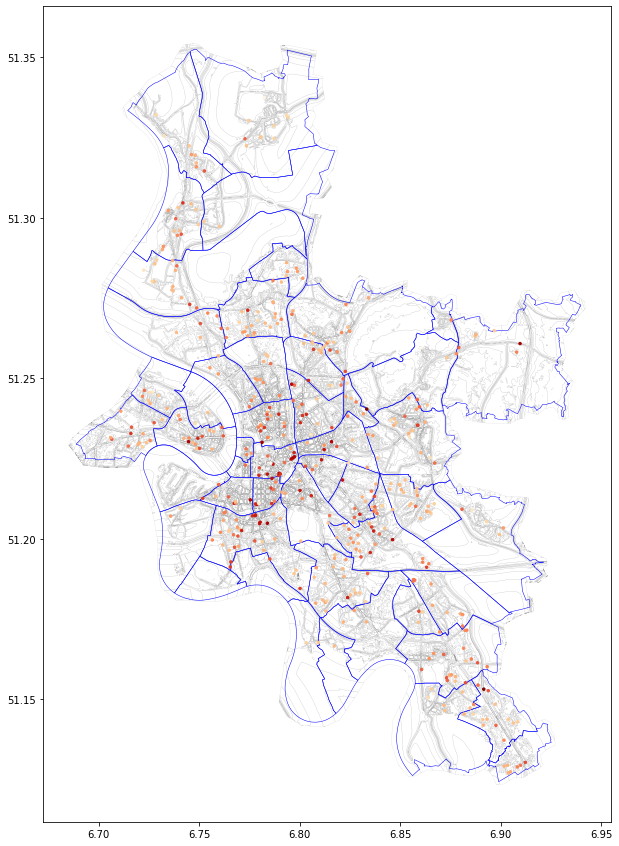

In [175]:
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
noise.plot(ax=ax, markersize=6, column='DB_TAG', cmap='OrRd', zorder=3)

<AxesSubplot:>

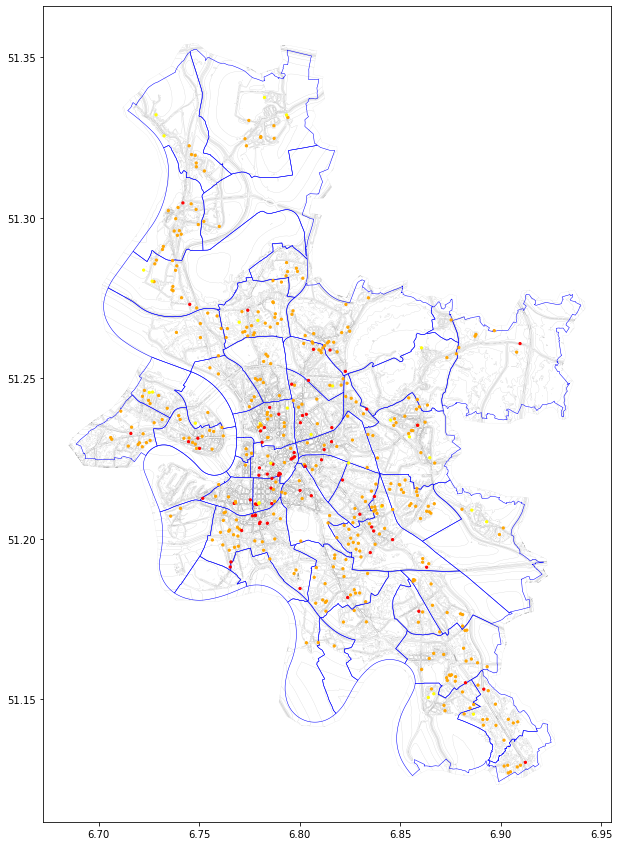

In [146]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l in range(30,50):
            cols.append('yellow')
        elif l in range(50,65):
            cols.append('orange')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above
cols=pltcolor(noise['DB_TAG'])

fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.2)
noise.plot(ax=ax, markersize=5, c=cols, zorder=3)


<AxesSubplot:>

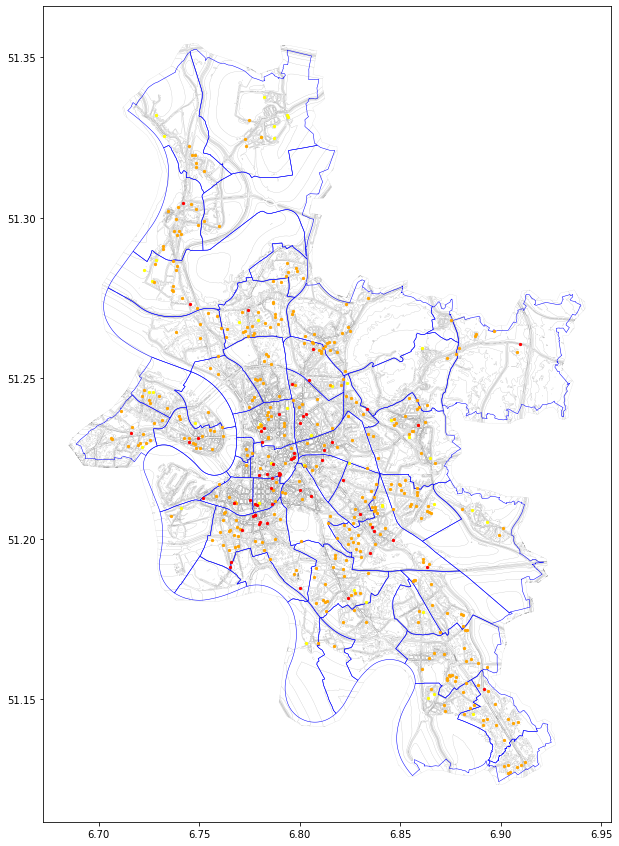

In [176]:
df2 = noise.loc[(noise['DB_TAG'] <= 50)]
df3 = noise.loc[(noise['DB_TAG'] > 50 )&(noise['DB_TAG'] <= 65)]
df4 = noise.loc[(noise['DB_TAG'] > 65)]

fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
df2.plot(ax=ax, markersize=5, color='yellow', zorder=3)
df3.plot(ax=ax, markersize=5, color='orange', zorder=4)
df4.plot(ax=ax, markersize=5, color='red', zorder=5)
